<a href="https://colab.research.google.com/github/ErickAsencios271010/CURSO_IA/blob/master/CNN_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
files.upload()  # Esto abrirá un cuadro de diálogo para subir el archivo kaggle.json


Saving image-classification-using-cnn-94-accuracy.ipynb to image-classification-using-cnn-94-accuracy (1).ipynb


{'image-classification-using-cnn-94-accuracy (1).ipynb': b'{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "metadata": {\n    "papermill": {\n     "duration": 0.02669,\n     "end_time": "2022-03-26T11:08:15.373073",\n     "exception": false,\n     "start_time": "2022-03-26T11:08:15.346383",\n     "status": "completed"\n    },\n    "tags": []\n   },\n   "source": [\n    "<font size=\\"+3\\" color=Blue><b> <center><u>Image Classification on any custom dataset</u></center></b></font>"\n   ]\n  },\n  {\n   "cell_type": "markdown",\n   "metadata": {\n    "papermill": {\n     "duration": 0.024158,\n     "end_time": "2022-03-26T11:08:15.422410",\n     "exception": false,\n     "start_time": "2022-03-26T11:08:15.398252",\n     "status": "completed"\n    },\n    "tags": []\n   },\n   "source": [\n    "![](https://miro.medium.com/max/700/1*oB3S5yHHhvougJkPXuc8og.gif)"\n   ]\n  },\n  {\n   "cell_type": "markdown",\n   "metadata": {\n    "papermill": {\n     "duration": 0.024126,\n     "end_t

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
!kaggle datasets download -d puneet6060/intel-image-classification


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 345M/346M [00:02<00:00, 223MB/s]
100% 346M/346M [00:02<00:00, 181MB/s]


In [11]:
!unzip intel-image-classification.zip -d intel-image-classification


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: intel-image-classification/seg_train/seg_train/mountain/7506.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel-image-classification/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel-image-classification/seg_train/seg_train

In [12]:
x = '/content/intel-image-classification/seg_train/seg_train'
path = Path(x)
path.ls()


(#6) [Path('/content/intel-image-classification/seg_train/seg_train/glacier'),Path('/content/intel-image-classification/seg_train/seg_train/sea'),Path('/content/intel-image-classification/seg_train/seg_train/mountain'),Path('/content/intel-image-classification/seg_train/seg_train/forest'),Path('/content/intel-image-classification/seg_train/seg_train/buildings'),Path('/content/intel-image-classification/seg_train/seg_train/street')]

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
from pathlib import Path


In [14]:
# Definir ruta de los datos
train_dir = '/content/intel-image-classification/seg_train/seg_train'
test_dir = '/content/intel-image-classification/seg_test/seg_test'

# Crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generar datos de entrenamiento y prueba
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 clases en el conjunto de datos de Intel
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.4722 - loss: 1.2846 - val_accuracy: 0.7087 - val_loss: 0.7917
Epoch 2/20
  1/438 ━━━━━━━━━━━━━━━━━━━━ 18:36 3s/step - accuracy: 0.6875 - loss: 0.8835

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6875 - loss: 0.8835 - val_accuracy: 0.7083 - val_loss: 0.8024
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 967s 2s/step - accuracy: 0.6531 - loss: 0.9086 - val_accuracy: 0.7900 - val_loss: 0.6005
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 62ms/step - accuracy: 0.7812 - loss: 0.6849 - val_accuracy: 0.7917 - val_loss: 0.4482
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 943s 2s/step - accuracy: 0.7088 - loss: 0.7750 - val_accuracy: 0.7907 - val_loss: 0.5979
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.8125 - loss: 0.7171 - val_accuracy: 0.7917 - val_loss: 0.6374
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.7549 - loss: 0.6756 - val_accuracy: 0.8253 - val_loss: 0.4973
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - accuracy: 0.6562 - loss: 0.8851 - val_accuracy: 0.7500 - val_loss: 0.6482
Epoch 9/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 930s 2s/step - accuracy: 0.7755 - loss: 0.6294 - val_accuracy: 0

In [18]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 49s 524ms/step - accuracy: 0.8545 - loss: 0.3961
Test Loss: 0.40016329288482666
Test Accuracy: 0.859333336353302


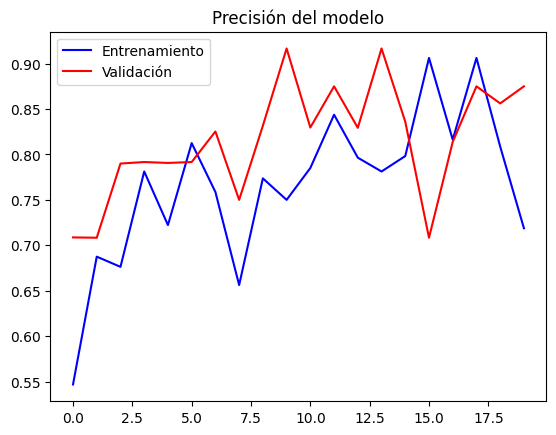

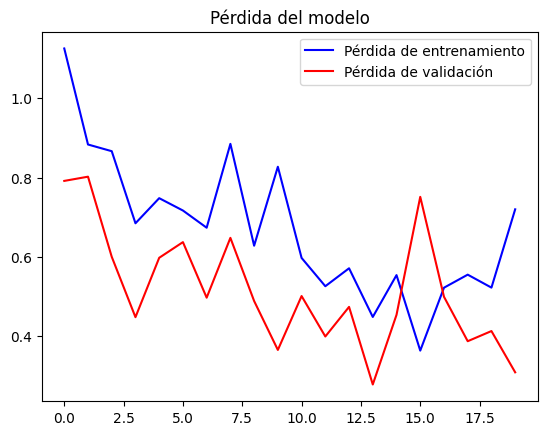

In [19]:
# Graficar precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Validación')
plt.title('Precisión del modelo')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida de validación')
plt.title('Pérdida del modelo')
plt.legend()
plt.show()


In [20]:
model.save('cnn_intel_image_classification.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


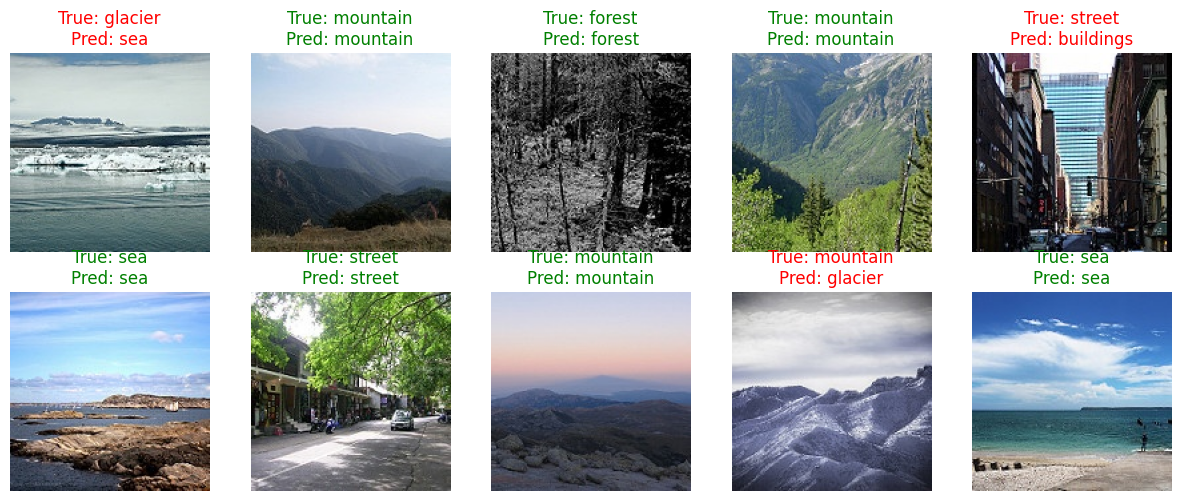

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener el diccionario de clases del generador de datos
class_labels = list(train_generator.class_indices.keys())

# Función para mostrar imágenes con clasificación correcta/incorrecta
def show_classification_examples(generator, model, class_labels, num_images=10):
    images_shown = 0
    plt.figure(figsize=(15, 15))
    for images, labels in generator:
        preds = model.predict(images)
        for i in range(images.shape[0]):
            if images_shown >= num_images:
                break
            true_label = np.argmax(labels[i])
            pred_label = np.argmax(preds[i])
            color = 'green' if true_label == pred_label else 'red'
            plt.subplot(5, 5, images_shown + 1)
            plt.imshow(images[i])
            plt.title(f"True: {class_labels[true_label]}\nPred: {class_labels[pred_label]}", color=color)
            plt.axis('off')
            images_shown += 1
        if images_shown >= num_images:
            break
    plt.show()

# Llamar a la función para mostrar ejemplos
show_classification_examples(test_generator, model, class_labels, num_images=10)


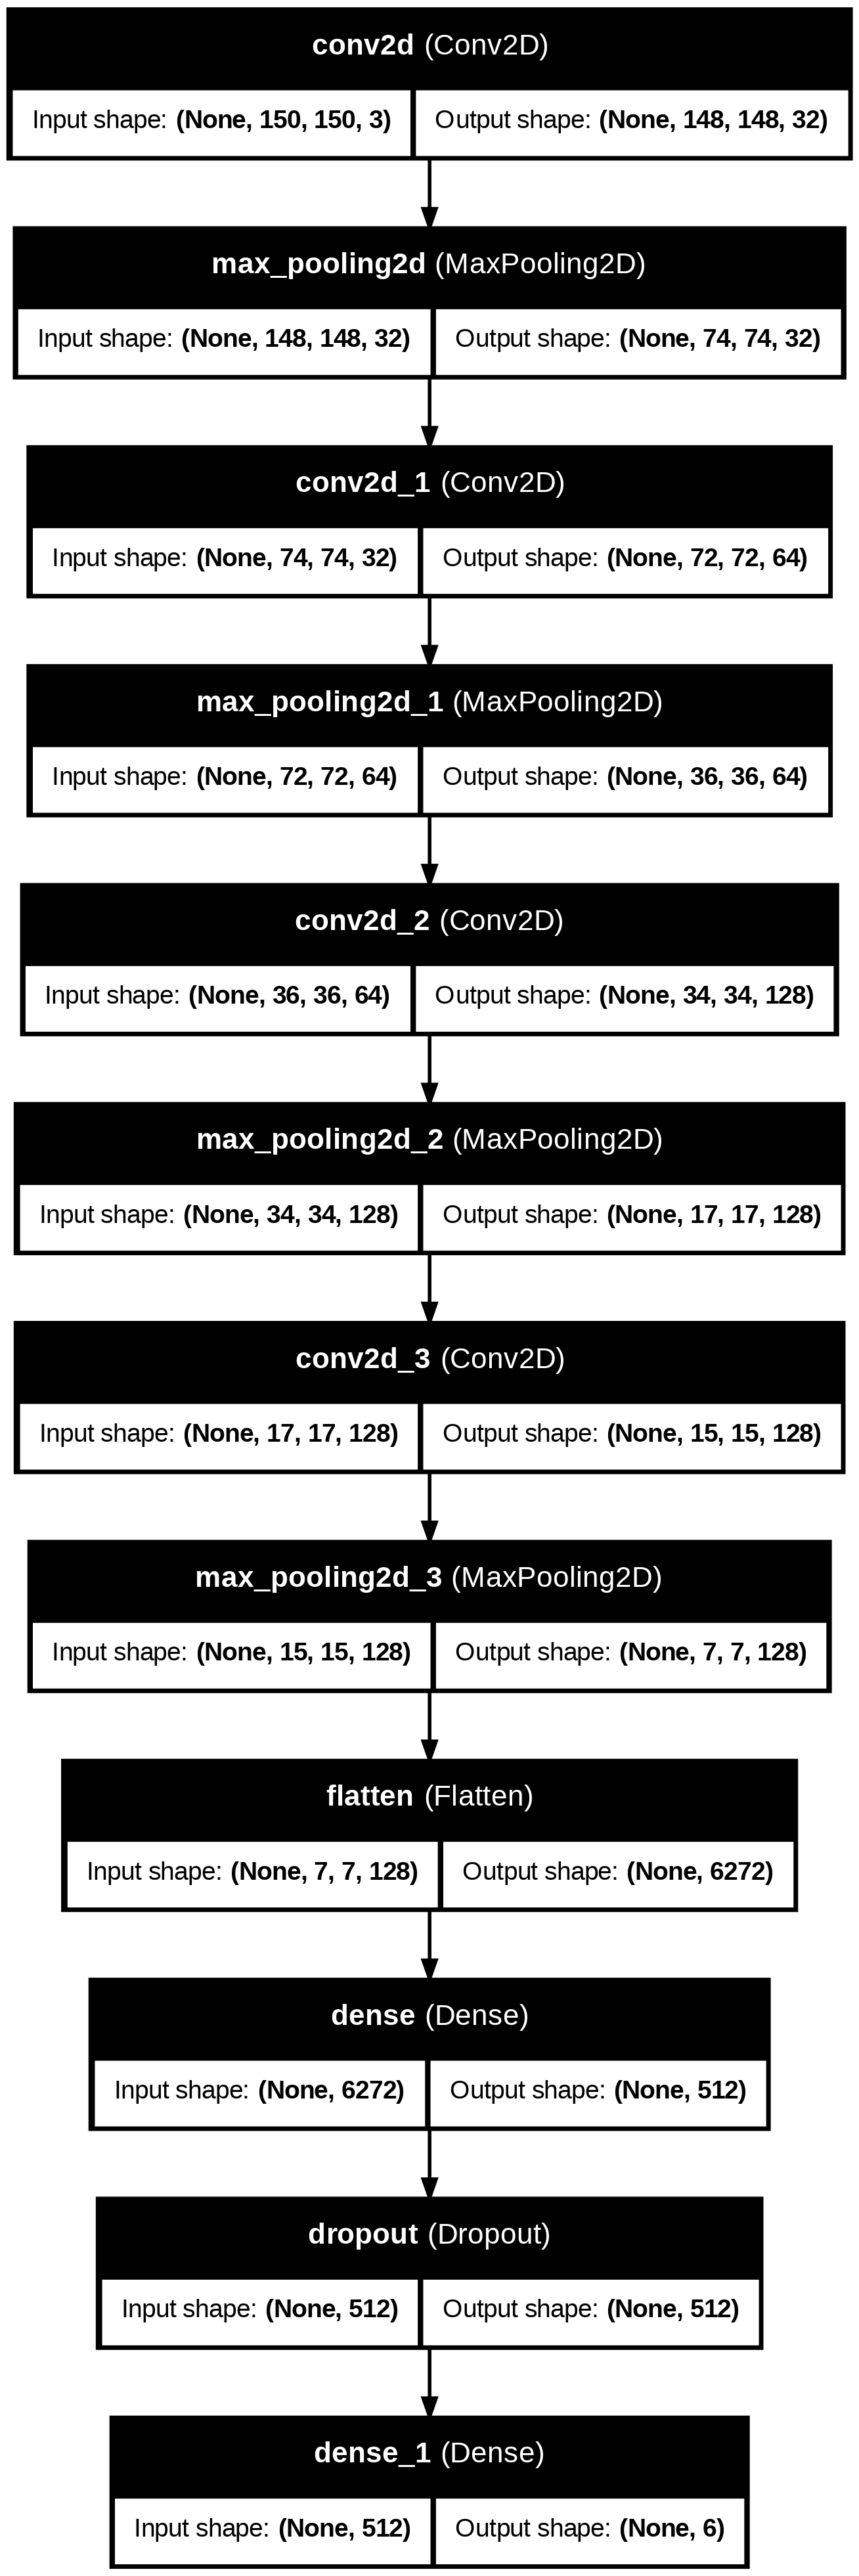

In [22]:
from tensorflow.keras.utils import plot_model

# Crear un diagrama de flujo de la CNN
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


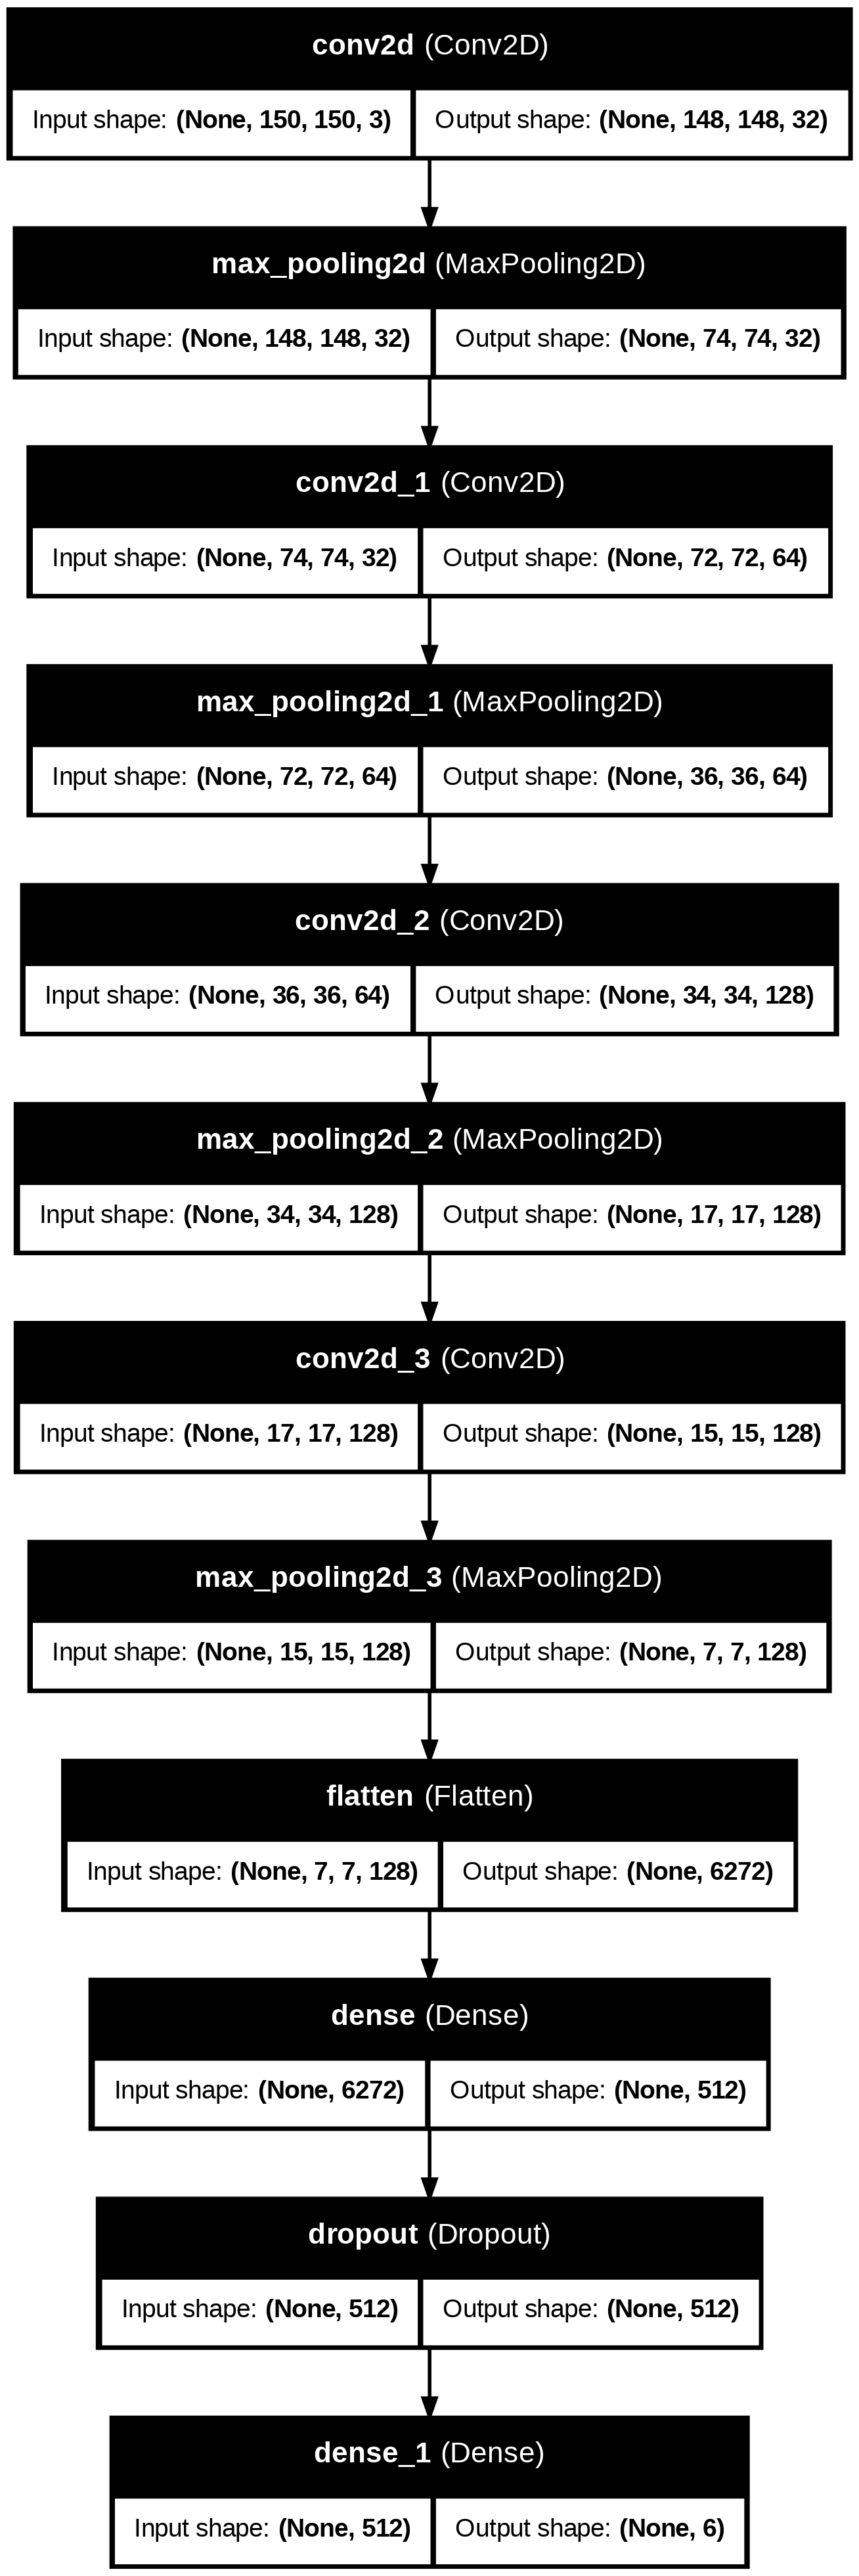

In [23]:
from IPython.display import Image
Image(filename='cnn_architecture.png')
